In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import folium

cdr = ['#393e46', '#ff2e63', '#30e3ca']
idr = ['#f8b400', '#ff2e63', '#30e3ca']

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup

browser = webdriver.Chrome('C:\selenium/chromedriver.exe')
url = 'https://wuhanvirus.kr/'
browser.get(url)

In [3]:
plt.rc("font" , family = "Malgun Gothic")
plt.rc("axes" , unicode_minus = False)

In [4]:
html= browser.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="ko"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/><title>코로나19(COVID-19) 실시간 상황판</title><meta content="website" property="og:type"/><meta content="코로나19(COVID-19) 실시간 상황판" property="og:title"/><meta content="https://coronaboard.kr" property="og:url"/><meta content="코로나19(신종 코로나바이러스)에 관한 한국, 일본, 중국 및 세계 각 국가들의 통계 및 뉴스 등을 취합하여 실시간 정보를 제공합니다." property="og:description"/><meta content="코로나19(COVID-19) 실시간 상황판" property="og:site_name"/><meta content="//coronaboard.kr/images/ogimage_new3.png" property="og:image"/><meta content="ko_KR" property="og:locale"/><meta content="summary" name="twitter:card"/><meta content="no-referrer" name="referrer"/><link href="/images/favicon.ico?v=2" rel="shortcut icon" type="image/x-icon"/><link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" integrity="sha384-Vkoo8x4CGsO3+Hhxv8T/Q5PaXtkKtu6ug5TOeNV6gBiFeWPGFN9MuhOf23Q9Ifjh" r

In [5]:
tables = soup.select('#country-table > div > div > table')
table = tables[0]
table

IndexError: list index out of range

In [ ]:
table_html = str(table)

In [ ]:
table_df_list = pd.read_html(table_html)

In [ ]:
table_df = table_df_list[0]
table_df

In [ ]:
table_df = table_df.drop("Unnamed: 0", axis =1)

In [ ]:
table_df

In [ ]:
table_df.to_csv("world.csv" , index = False)

In [6]:
df_w = pd.read_csv("data/world.csv" , encoding = "cp949")
df_w.head()

,국가,확진자,사망자,완치,사망률(%),완치율(%)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,중국,80905.0,3237.0,69615.0,4.0,86.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,이탈리아,31506.0,2503.0,2941.0,7.9,9.3
4,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_drop_row = df_w.dropna(axis=0)
df_drop_row

,국가,확진자,사망자,완치,사망률(%),완치율(%)
1,중국,80905.0,3237.0,69615.0,4.0,86.0
3,이탈리아,31506.0,2503.0,2941.0,7.9,9.3
5,이란,16169.0,988.0,5389.0,6.1,33.3
6,스페인,11826.0,533.0,1028.0,4.5,8.7
8,독일,9367.0,26.0,67.0,0.3,0.7
10,한국,8413.0,86.0,1540.0,1.0,18.3
12,프랑스,7730.0,175.0,602.0,2.3,7.8
14,미국,6522.0,116.0,106.0,1.8,1.6
16,스위스,2742.0,27.0,15.0,1.0,0.5
18,영국,1950.0,71.0,65.0,3.6,3.3


In [8]:
df = df_drop_row.drop(["완치율(%)"] , axis =1)
df

,국가,확진자,사망자,완치,사망률(%)
1,중국,80905.0,3237.0,69615.0,4.0
3,이탈리아,31506.0,2503.0,2941.0,7.9
5,이란,16169.0,988.0,5389.0,6.1
6,스페인,11826.0,533.0,1028.0,4.5
8,독일,9367.0,26.0,67.0,0.3
10,한국,8413.0,86.0,1540.0,1.0
12,프랑스,7730.0,175.0,602.0,2.3
14,미국,6522.0,116.0,106.0,1.8
16,스위스,2742.0,27.0,15.0,1.0
18,영국,1950.0,71.0,65.0,3.6


In [9]:
df[['확진자', '사망자','완치']] = df[['확진자', '사망자','완치']].astype(int)
df

,국가,확진자,사망자,완치,사망률(%)
1,중국,80905,3237,69615,4.0
3,이탈리아,31506,2503,2941,7.9
5,이란,16169,988,5389,6.1
6,스페인,11826,533,1028,4.5
8,독일,9367,26,67,0.3
10,한국,8413,86,1540,1.0
12,프랑스,7730,175,602,2.3
14,미국,6522,116,106,1.8
16,스위스,2742,27,15,1.0
18,영국,1950,71,65,3.6


In [17]:
df_t = df[1:6]
df_t

,국가,확진자,사망자,완치,사망률(%)
3,이탈리아,31506,2503,2941,7.9
5,이란,16169,988,5389,6.1
6,스페인,11826,533,1028,4.5
8,독일,9367,26,67,0.3
10,한국,8413,86,1540,1.0


In [18]:
df_dd = df_t[["국가","사망률(%)"]]
df_dd.head(5)

,국가,사망률(%)
3,이탈리아,7.9
5,이란,6.1
6,스페인,4.5
8,독일,0.3
10,한국,1.0


In [19]:
df_d = df_t.drop(["사망률(%)"] , axis =1)
df_d

,국가,확진자,사망자,완치
3,이탈리아,31506,2503,2941
5,이란,16169,988,5389
6,스페인,11826,533,1028
8,독일,9367,26,67
10,한국,8413,86,1540


In [20]:
df_m= df_d.melt(id_vars = ["국가"] , value_vars = ["확진자","사망자","완치"],
                 var_name='Case' , value_name = "Count").sort_values('Count')
df_m

,국가,Case,Count
8,독일,사망자,26
13,독일,완치,67
9,한국,사망자,86
7,스페인,사망자,533
6,이란,사망자,988
12,스페인,완치,1028
14,한국,완치,1540
5,이탈리아,사망자,2503
10,이탈리아,완치,2941
11,이란,완치,5389


In [21]:
df_g = px.bar(df_m , x = "Count" , y = "국가",
                color = "Case" , barmode = "group",
                template = "ggplot2" , title = "Top5" , orientation = "h")
df_g.show()

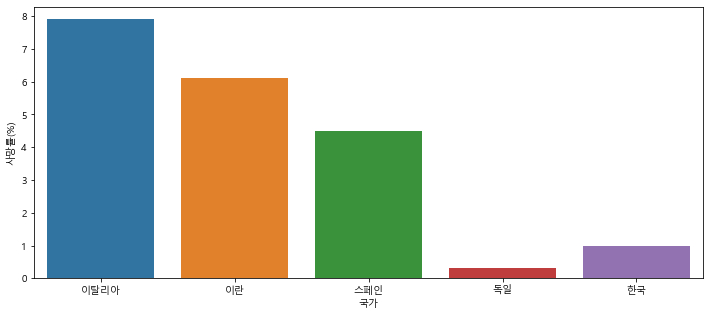

In [22]:
plt.figure(figsize = (12,5))
sns.barplot(data = df_dd , x=  '국가' , y = "사망률(%)")